In [1]:
import numpy as np
import audioflux as af
from audioflux.type import SpectralFilterBankScaleType
import math
from IPython.display import Audio, display, Image
import PIL

In [2]:
def get_spectrogram(audio_arr):
    # Create BFT object and extract mel spectrogram
    bft_obj = af.BFT(num=128, radix2_exp=12, samplate=SAMPLE_RATE,
                     scale_type=SpectralFilterBankScaleType.MEL)

    spec_arr = bft_obj.bft(audio_arr)
    spec_arr = np.abs(spec_arr)
    return bft_obj, spec_arr

96818


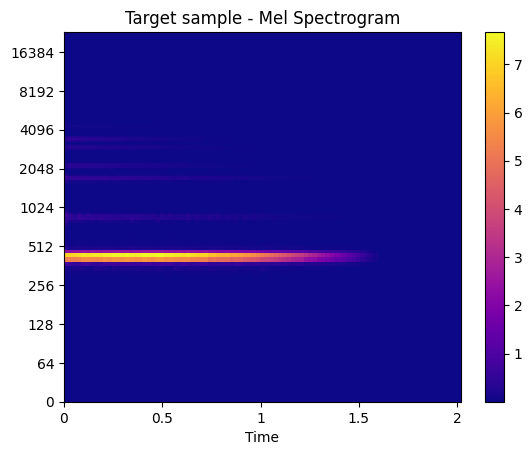

In [3]:
audio_arr, sr = af.read("/home/wint3rmute/Downloads/out.wav")
sample_arr = audio_arr
NUM_SAMPLES = sample_arr.shape[-1]
SAMPLE_RATE = 48000

bft_obj, spec_arr = get_spectrogram(audio_arr)
sample_spectrogram = spec_arr

# Display spectrogram

import matplotlib.pyplot as plt

from audioflux.display import fill_spec

audio_len = audio_arr.shape[-1]
print(audio_len)

fig, ax = plt.subplots()

img = fill_spec(spec_arr, axes=ax,

          x_coords=bft_obj.x_coords(audio_len),

          y_coords=bft_obj.y_coords(),

          x_axis='time', y_axis='log',

          title='Target sample - Mel Spectrogram')

fig.colorbar(img, ax=ax)
Audio(data=sample_arr, rate=SAMPLE_RATE)

96818


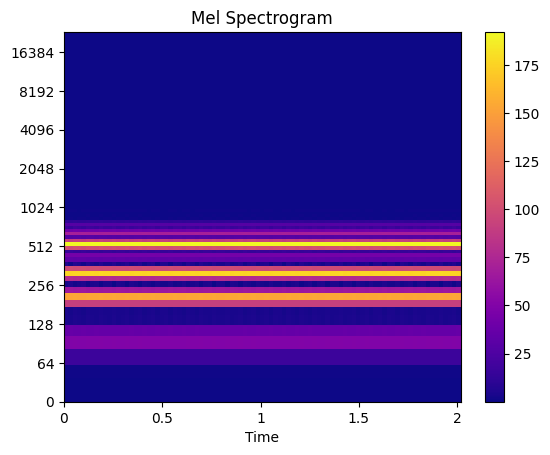

In [4]:
class SineSource:
    def __init__(self, frequency: float):
        self.frequency = frequency
        self.phase = 0.0
        self.phase_diff = (2.0 * math.pi * frequency) / SAMPLE_RATE
    
    def tick(self, modulation):
        result = math.sin(self.phase + modulation)
        self.phase += self.phase_diff
        return result

def play_synth(mod_mult, mod_strength):
    source = SineSource(440)
    modulator = SineSource(440 * mod_mult)

    audio_arr = np.zeros(NUM_SAMPLES)
    sr = SAMPLE_RATE

    for i in range(NUM_SAMPLES):
        # print("tick")
        audio_arr[i] = source.tick(modulator.tick(0) * mod_strength)
        # modulator.phase_diff += 0.00000001
    return audio_arr

audio_arr = play_synth(0.25, 2)


bft_obj, spec_arr = get_spectrogram(audio_arr)

audio_len = audio_arr.shape[-1]
print(audio_len)

fig, ax = plt.subplots()
img = fill_spec(spec_arr, axes=ax,
          x_coords=bft_obj.x_coords(audio_len),
          y_coords=bft_obj.y_coords(),
          x_axis='time', y_axis='log',
          title='Mel Spectrogram')

fig.colorbar(img, ax=ax)
# plt.show()
# print(spec_arr)

In [5]:
# from scipy.optimize import differential_evolution

# def target_fun(arg):
#     audio_arr = play_synth(arg[0], arg[1])
#     bft_obj, synth_spectrogram = get_spectrogram(audio_arr)

#     return abs(sum(sum(synth_spectrogram - sample_spectrogram)))
# # synth_spectrogram.shape

# def callback(xk, convergence):
#     print(xk)

# result = differential_evolution(target_fun, bounds=[ (-1, 2), (-1, 2)], callback=callback, popsize=20, maxiter=30, workers=8)
# result

In [6]:
# audio_arr = play_synth(result.x[0], result.x[1])

# bft_obj, spec_arr = get_spectrogram(audio_arr)

# audio_len = audio_arr.shape[-1]
# print(audio_len)

# fig, ax = plt.subplots()
# img = fill_spec(spec_arr, axes=ax,
#           x_coords=bft_obj.x_coords(audio_len),
#           y_coords=bft_obj.y_coords(),
#           x_axis='time', y_axis='log',
#           title='Mel Spectrogram')

# fig.colorbar(img, ax=ax)

NameError: name 'result' is not defined

In [ ]:
# bft_obj, target_arr = get_spectrogram(play_synth(0.25, 2))
# bft_obj, spec_arr_2 = get_spectrogram(play_synth(0.25, 2))

# abs(sum(sum(target_arr - spec_arr_2)))
r = af.write("/tmp/test.wav", audio_arr, SAMPLE_RATE)
# print(r)

Audio(data=audio_arr, rate=SAMPLE_RATE)

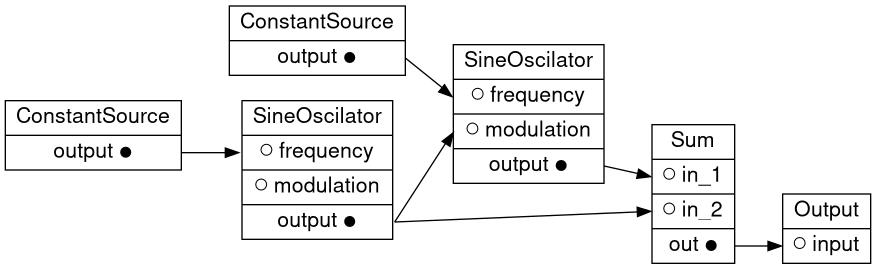

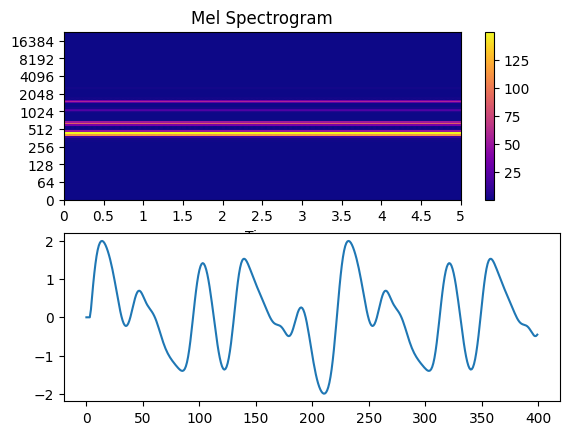

In [14]:
from prototyping import *

g = DspGraph()

sine_1 = g.add_node(SineOscilator())
sine_2 = g.add_node(SineOscilator())
# adsr = g.add_node(ADSR())
sum = g.add_node(Sum())
output = g.add_node(Output())
source_1 = g.add_node(ConstantSource())
source_2 = g.add_node(ConstantSource())

g.nodes[source_2].outputs.output = 440 * 2.5

g.patch(sine_1, "output", sine_2, "modulation")

g.patch(source_1, "output", sine_2, "frequency")
g.patch(source_2, "output", sine_1, "frequency")
g.patch(sine_2, "output", sum, "in_1")
g.patch(sine_1, "output", sum, "in_2")

g.patch(sum, "out", output, "input")

audio_arr = np.zeros(SAMPLE_RATE * 5)

for i in range(len(audio_arr)):
    audio_arr[i] = (g.nodes[output].inputs.input)
    g.tick()
    # time.sleep(0.01)
    
# audio_arr
display(Image(g.draw()))

bft_obj, spec_arr = get_spectrogram(audio_arr)

audio_len = audio_arr.shape[-1]

fig, (ax, ax2) = plt.subplots(2, 1, sharex=False, sharey=False)
img = fill_spec(spec_arr, axes=ax,
          x_coords=bft_obj.x_coords(audio_len),
          y_coords=bft_obj.y_coords(),
          x_axis='time', y_axis='log',
          title='Mel Spectrogram')

fig.colorbar(img, ax=ax)

ax2.plot(audio_arr[:400])

display(Audio(data=audio_arr, rate=SAMPLE_RATE))


In [ ]:

# plt.show()
# print(spec_arr)